In [1]:
# 1. 載入必要的函式庫
# 假設你在前一個 notebook 儲存了分割後的資料 (或者重新執行前一個 notebook 的分割步驟)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# 2. 定義模型
# Baseline model: Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=42) 

# 3. 處理不平衡資料的技術 (Under-sampling / Over-sampling)
# 由於是 Baseline，可以先使用模型參數來處理不平衡，而不是專門的採樣技術
# class_weight='balanced' 會根據類別頻率自動調整權重，是很好的 Baseline 方法
baseline_model = LogisticRegression(
    solver='liblinear', 
    random_state=42, 
    class_weight='balanced' 
)

In [4]:
# --- 從 EDA Notebook 複製過來的資料準備步驟 ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 載入資料
df = pd.read_csv('../data/creditcard.csv') # 請確認路徑是否正確

# 2. 特徵工程/標準化 (確保與 EDA Notebook 保持一致)
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# 3. 定義特徵 (X) 和目標 (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 4. 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
# 1. 訓練模型
baseline_model.fit(X_train, y_train)

# 2. 預測
# 預測類別 (0 或 1)
y_pred = baseline_model.predict(X_test)
# 預測機率 (用於 AUC 和 Precision/Recall 曲線)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

--- Confusion Matrix ---
[[55478  1386]
 [    8    90]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


--- AUC Score: 0.9721 ---


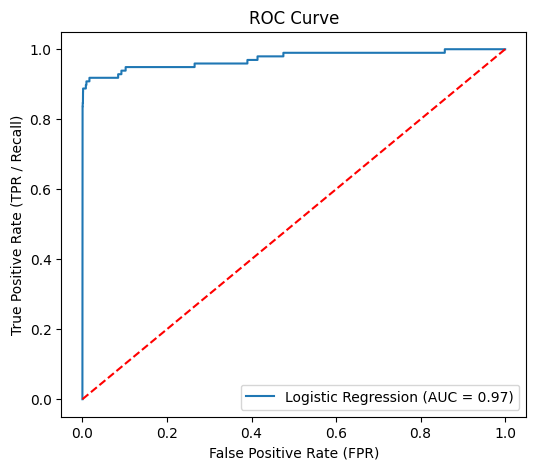

In [7]:
import matplotlib.pyplot as plt
# 1. 混淆矩陣 (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(conf_matrix)

# 2. 分類報告 (Classification Report) - 觀察 Precision/Recall
print("\n--- Classification Report ---")
# 由於詐欺 (Class 1) 是我們最關心的，要特別關注 Class 1 的 Recall 和 Precision
print(classification_report(y_test, y_pred)) 

# 3. AUC (Area Under ROC Curve) - 衡量模型整體區分能力
auc_score = roc_auc_score(y_test, y_proba)
print(f"\n--- AUC Score: {auc_score:.4f} ---")

# 4. 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.legend()
plt.show()

In [8]:
import joblib
import os

# 確保 models 資料夾存在
model_dir = '../src/models'
os.makedirs(model_dir, exist_ok=True)

# 儲存模型供 FastAPI 使用
model_path = os.path.join(model_dir, 'baseline_model.pkl')
joblib.dump(baseline_model, model_path)

print(f"Baseline Model 儲存至: {model_path}")

Baseline Model 儲存至: ../src/models\baseline_model.pkl
